In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import pytz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/311SerivceRequest_dataset/dataVisual_ServiceReq.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062842 entries, 0 to 1062841
Data columns (total 32 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   service_request_id  1062842 non-null  object 
 1   requested_date      1062842 non-null  object 
 2   updated_date        1062842 non-null  object 
 3   closed_date         1030749 non-null  object 
 4   status_description  1062842 non-null  object 
 5   source              1062842 non-null  object 
 6   service_name        1062842 non-null  object 
 7   agency_responsible  1062842 non-null  object 
 8   comm_code           1062842 non-null  object 
 9   comm_name           1062842 non-null  object 
 10  longitude           1062842 non-null  float64
 11  latitude            1062842 non-null  float64
 12  point               1062842 non-null  object 
 13  request_year        1062842 non-null  int64  
 14  request_month       1062842 non-null  int64  
 15  request_day    

In [ ]:
#Filter the records from your dataframe df where closed_date is greater than or equal to requested_date,
#closed_date is not null, and duplicate_request is 'No'

print("\n\033[1m"+"Agency division and the count of requests handles by each division:"+"\033[0m")
efficiencyDF = df[(df['closed_date'] >= df['requested_date']) &
                 (df['closed_date'].notna()) &
                 (df['duplicate_request'] == 'No')]
print(f"For answering the response efficiency, we have considered {efficiencyDF.shape[0]} requests")

#The most and least request handled agencies
grouped_counts = efficiencyDF.groupby(['agency_division']).size().reset_index(name='count')
sorted_counts = grouped_counts.sort_values(by='count', ascending=False)
first_row = sorted_counts.head(1).to_string(index=False, header=False)
last_row = sorted_counts.tail(1).to_string(index=False, header=False)
print(f"The agency that handled the highest number of service requests and its count: {first_row}")
print(f"The agency that handled the lowest number of service requests and its count: {last_row}")
print("Agency division and the count of requests handles by each division is as given below:")
display(sorted_counts.head(6))

# Group by 'agency_division' and calculate the count of requests and average response time
print("\n\033[1m"+"Agency division, Count of requests and its efficiency:"+"\033[0m")
groupedEfficiencyDF = efficiencyDF.groupby('agency_division').agg(
    request_count=('service_request_id', 'size'),
    average_response_time=('response_time', 'mean')
).reset_index()
groupedEfficiencyDF['average_response_time'] = groupedEfficiencyDF['average_response_time'].round(2)
groupedEfficiencyDF = groupedEfficiencyDF.sort_values(by='average_response_time', ascending=True)
first_row = groupedEfficiencyDF.head(1).to_string(index=False, header=False)
last_row = groupedEfficiencyDF.tail(1).to_string(index=False, header=False)
print(f"The most efficient agency and its response time: {first_row}")
print(f"The least efficient agency and its response time: {last_row}")
print("Agency division, Count of requests and its efficiency in days:")
display(groupedEfficiencyDF)


# How does the response efficiency vary across different years
print("\n\033[1m"+"Response efficiency of Agency division over years:"+"\033[0m")
average_response_time_per_year = efficiencyDF.groupby('request_year').agg(
    request_count=('service_request_id', 'size'),
    average_response_time=('response_time', 'mean')
).reset_index()
average_response_time_per_year['average_response_time'] = average_response_time_per_year['average_response_time'].round(2)
average_response_time_per_year = average_response_time_per_year.sort_values(by='request_year', ascending=True)
print("Average response efficiency per year for all agency divisions:")
display(average_response_time_per_year)


# How the response efficiency vary across different years for each agency divisions
average_response_time_per_year_and_agency = efficiencyDF.groupby(['request_year', 'agency_division']).agg(
    request_count=('service_request_id', 'size'),
    average_response_time=('response_time', 'mean')
).reset_index()
average_response_time_per_year_and_agency['average_response_time'] = average_response_time_per_year_and_agency['average_response_time'].round(2)
average_response_time_per_year_and_agency = average_response_time_per_year_and_agency.sort_values(by=['request_year', 'agency_division'], ascending=True)
#display(average_response_time_per_year_and_agency)


pivoted_df = average_response_time_per_year_and_agency.pivot(index='agency_division', columns='request_year', values=['request_count', 'average_response_time'])
display(pivoted_df)



Agency division and the count of requests handles by each division:
For answering the response efficiency, we have considered 1021700 requests
The agency that handled the highest number of service requests and its count: Operational Services and Compliance 440153
The agency that handled the lowest number of service requests and its count: Fleet and Inventory 4
Agency division and the count of requests handles by each division is as given below:


,agency_division,count
11,Operational Services and Compliance,440153
3,Community Services,263083
13,Planning & Development Services,108340
1,Calgary Police & Fire Services,92933
17,Utilities & Environmental Protection,34544
16,Transportation,29855



Agency division, Count of requests and its efficiency:
The most efficient agency and its response time: Elected Officials 364 0.01
The least efficient agency and its response time: Operational Services and Compliance 440153 15.53
Agency division, Count of requests and its efficiency in days:


,agency_division,request_count,average_response_time
6,Elected Officials,364,0.01
10,Office of the City Auditor,4,1.75
4,Corporate Wide Service Requests,4970,2.04
17,Utilities & Environmental Protection,34544,3.98
9,Legal or Legislative Services,2797,4.21
1,Calgary Police & Fire Services,92933,4.78
16,Transportation,29855,4.85
14,Project Information and Control Systems,14110,5.03
2,Chief Financial Officer Department,21880,5.39
5,Deputy City Manager's Office,537,5.88



Response efficiency of Agency division over years:
Average response efficiency per year for all agency divisions:


,request_year,request_count,average_response_time
0,2023,535240,14.40
1,2024,486460,10.62


request_count            \
request_year                                     2023      2024   
agency_division                                                   
Affiliated Organizations                         62.0      58.0   
Calgary Police & Fire Services                50360.0   42573.0   
Chief Financial Officer Department            21880.0       NaN   
Community Services                           130289.0  132794.0   
Corporate Wide Service Requests                2191.0    2779.0   
Deputy City Manager's Office                    537.0       NaN   
Elected Officials                               192.0     172.0   
Fleet and Inventory                               4.0       NaN   
Information Services                           1677.0    3260.0   
Legal or Legislative Services                  1288.0    1509.0   
Office of the City Auditor                        3.0       1.0   
Operational Services and Compliance          178594.0  261559.0   
Partnerships                                     40.0       NaN   
Planning & Development Services               75281.0   33059.0   
Project Information and Control Systems        5545.0    8565.0   
Recreation and Social Programs                 3029.0       NaN   
Transportation                                29724.0     131.0   
Utilities & Environmental Protection          34544.0       NaN   

                                        average_response_time         
request_year                                             2023   2024  
agency_division                                                       
Affiliated Organizations                                10.63  15.12  
Calgary Police & Fire Services                           5.57   3.84  
Chief Financial Officer Department                       5.39    NaN  
Community Services                                      16.21  14.70  
Corporate Wide Service Requests                          2.68   1.54  
Deputy City Manager's Office                             5.88    NaN  
Elected Officials                                        0.01   0.02  
Fleet and Inventory                                     14.25    NaN  
Information Services                                    20.26   8.61  
Legal or Legislative Services                            4.47   3.99  
Office of the City Auditor                               1.67   2.00  
Operational Services and Compliance                     23.74   9.92  
Partnerships                                             9.10    NaN  
Planning & Development Services                          7.72  10.92  
Project Information and Control Systems                  2.97   6.36  
Recreation and Social Programs                           9.69    NaN  
Transportation                                           4.85   5.61  
Utilities & Environmental Protection                     3.98    NaN

# Data Visualization

## Overview

<ipython-input-222-18525415157c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=requests_by_year, x='Closed Year', y='Total Request Count', palette='YlGnBu')


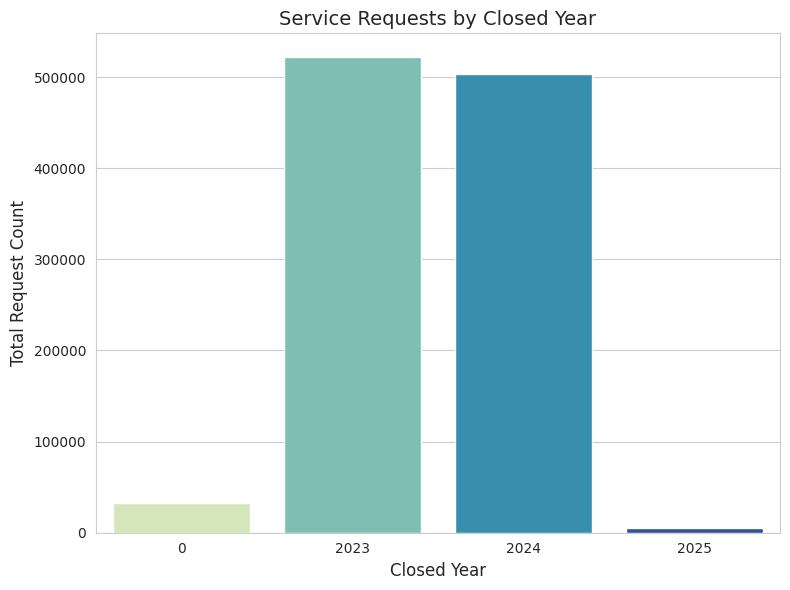

In [222]:
requests_by_year = df.groupby('closed_year')['service_request_id'].count().reset_index()
requests_by_year.columns = ['Closed Year', 'Total Request Count']
plt.figure(figsize=(8, 6))
sns.barplot(data=requests_by_year, x='Closed Year', y='Total Request Count', palette='YlGnBu')
plt.title('Service Requests by Closed Year', fontsize=14)
plt.xlabel('Closed Year', fontsize=12)
plt.ylabel('Total Request Count', fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-221-77804b179e8f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=requests_by_year, x='Updated Year', y='Total Request Count', palette='YlGnBu')


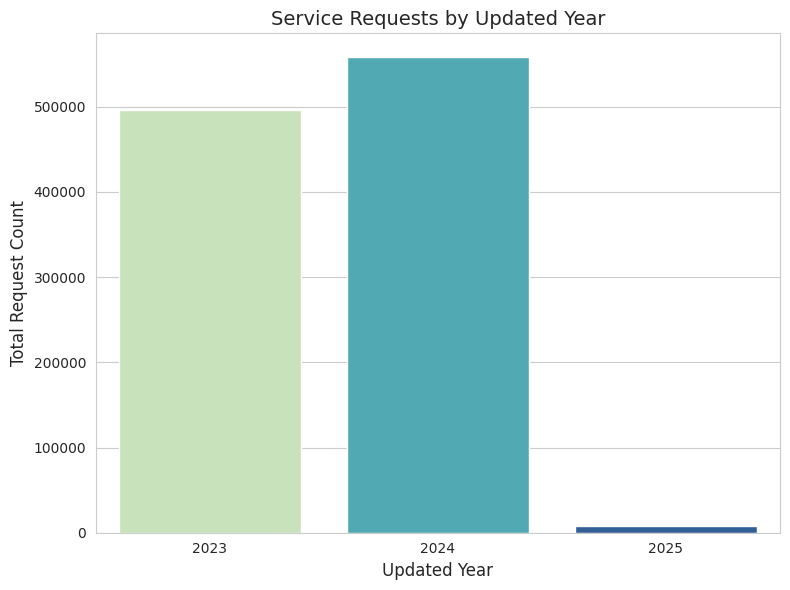

In [221]:
requests_by_year = df.groupby('update_year')['service_request_id'].count().reset_index()
requests_by_year.columns = ['Updated Year', 'Total Request Count']
plt.figure(figsize=(8, 6))
sns.barplot(data=requests_by_year, x='Updated Year', y='Total Request Count', palette='YlGnBu')
plt.title('Service Requests by Updated Year', fontsize=14)
plt.xlabel('Updated Year', fontsize=12)
plt.ylabel('Total Request Count', fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-220-dba4f99abf34>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=requests_by_year, x='Opened Year', y='Total Request Count', palette='YlGnBu')


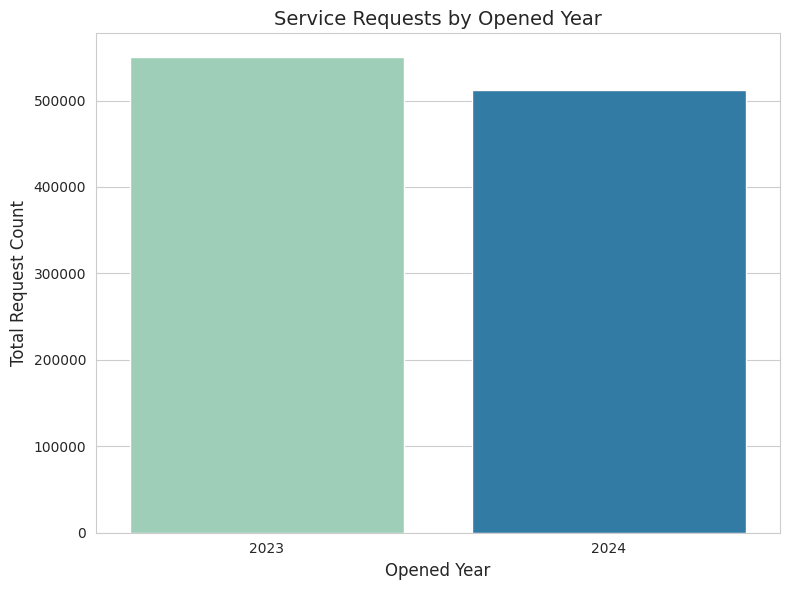

In [220]:
requests_by_year = df.groupby('request_year')['service_request_id'].count().reset_index()
requests_by_year.columns = ['Opened Year', 'Total Request Count']
plt.figure(figsize=(8, 6))
sns.barplot(data=requests_by_year, x='Opened Year', y='Total Request Count', palette='YlGnBu')
plt.title('Service Requests by Opened Year', fontsize=14)
plt.xlabel('Opened Year', fontsize=12)
plt.ylabel('Total Request Count', fontsize=12)
plt.tight_layout()
plt.show()

### Q1. *How does the response efficiency vary across different years?​*

In [ ]:
unstacked_df = pivoted_df.unstack()
unstacked_df = unstacked_df.reset_index()
unstacked_df.columns = ['Metric', 'Year', 'Agency Division', 'Value']
request_count_df = unstacked_df[unstacked_df["Metric"] == "request_count"]
response_time_df = unstacked_df[unstacked_df["Metric"] == "average_response_time"]
response_time_complete = response_time_df.dropna()

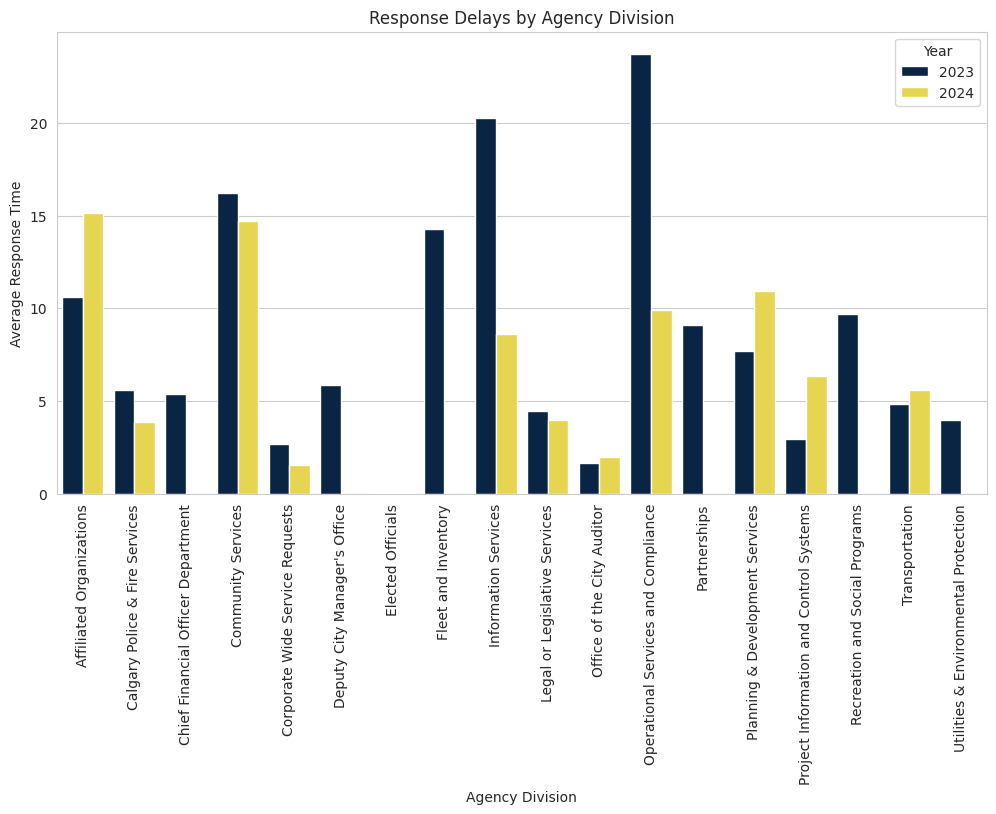

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=response_time_complete, x="Agency Division", y="Value", hue="Year", palette="cividis")
plt.xlabel("Agency Division")
plt.ylabel("Average Response Time")
plt.title("Response Delays by Agency Division")
plt.xticks(rotation=90)
plt.legend(title="Year")
plt.show()

## Interpertation:
Agencies like the Chief Financial Officer Department, Deputy City Manager's Office, Fleet and Inventory, Partnerships, Recreation and Social Programs, and Utilities & Environmental Protection do not have response times for the year 2024 because these names were given to them as agency subdivisions in that year.<div>



1.  The agencies with the **least response delays** are Elected Officials, Office of the City Auditor,Corporate Wide Service Requests.
2.   The agencies with the **least response delays** are Operational Services and Compliance, Information Services, Community Services.




### Q2. *Which agency handles the most and least number of service requests?​*

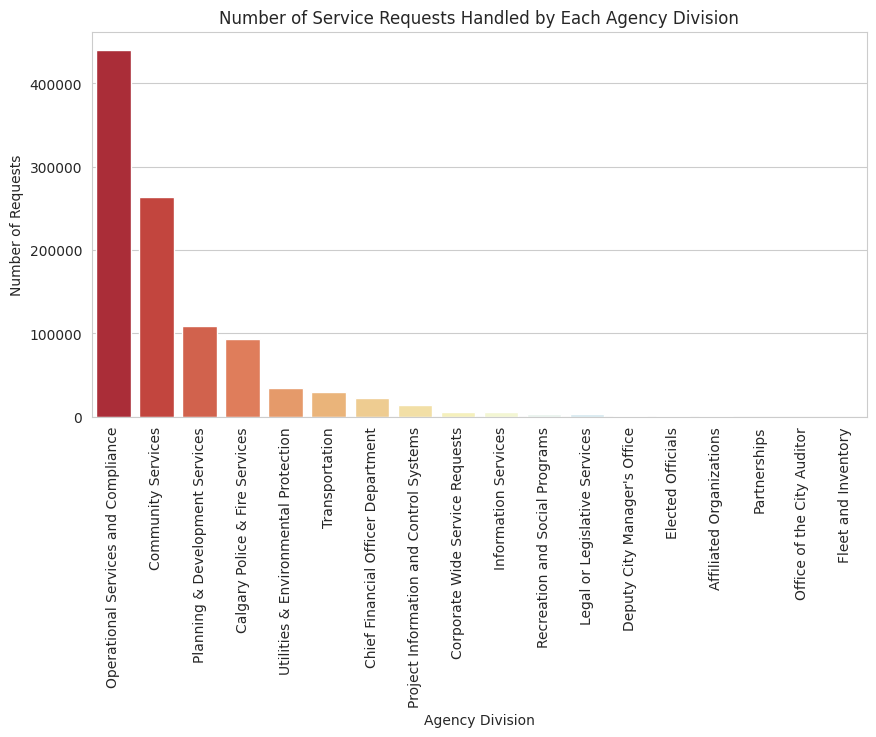

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='agency_division', y='count', data=sorted_counts,hue='agency_division',palette='RdYlBu')
plt.xticks(rotation=90)
plt.xlabel("Agency Division")
plt.ylabel("Number of Requests")
plt.title("Number of Service Requests Handled by Each Agency Division")
plt.show()


## Interpertation:

1.   The agency that handled the **highest number of service requests** is Operational Services and Compliance and its count is 440153

2.   The agency that handled the **lowest number of service requests** is Fleet and Inventory and its count is 4



### Q3. *What is the average response rate and time for resolving for service requests?​*

In [98]:
total_requests = df[df['modified_status'].isin(["Opened", "Duplicate (Open)", "Closed", "Duplicate (Closed)"])]
closed_requests = df[df['modified_status'] == "Closed"]
total_request_count = total_requests['service_request_id'].nunique()
closed_request_count = closed_requests['service_request_id'].nunique()
response_rate = closed_request_count / total_request_count if total_request_count > 0 else 0
print(f"Average Response Rate: {response_rate:.2f}")

Average Response Rate: 0.99


In [97]:
avg_response_time_days=df['response_time'].mean()
print(f"Average Response Time in days: {avg_response_time_days:.2f}")

Average Response Time in days: 12.63


<ipython-input-206-326375c5b323>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Metric', y='Value', data=metrics_df,palette='YlGnBu')


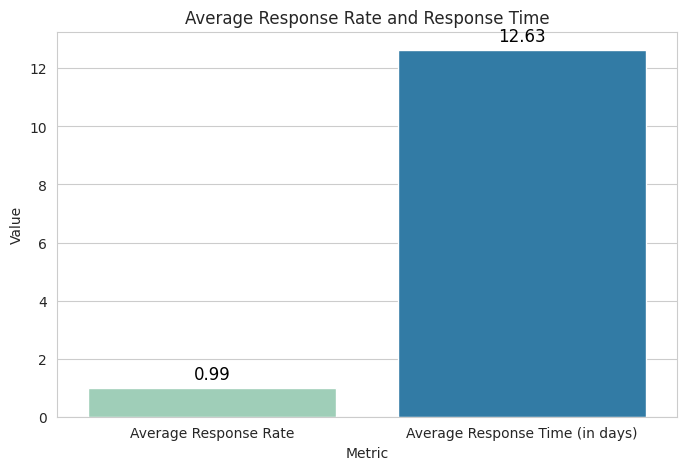

In [206]:
metrics = {'Metric': ['Average Response Rate', 'Average Response Time (in days)'],
           'Value': [response_rate, avg_response_time_days]}

metrics_df = pd.DataFrame(metrics)

plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Metric', y='Value', data=metrics_df,palette='YlGnBu')

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 10), textcoords='offset points')

plt.ylabel('Value')
plt.title('Average Response Rate and Response Time')
plt.show()

### Q4.*Which community has the largest and smallest number of service requests?*

In [110]:
main_df=df.copy()

In [155]:
import geopandas as gpd
import matplotlib.patches as mpatches
from shapely.geometry import Point, Polygon, MultiPolygon

multi_polygon_df = pd.read_csv("/content/drive/MyDrive/311SerivceRequest_dataset/Community_District_Boundaries_20250211.csv")

In [156]:
service_request_counts = main_df.groupby('comm_code')['service_request_id'].count().reset_index()
service_request_counts.columns = ['comm_code', 'service_request_count']
multi_polygon_gdf = multi_polygon_gdf.rename(columns={'COMM_CODE': 'comm_code'})
merged_gdf = multi_polygon_gdf.merge(service_request_counts, on='comm_code', how='left')
merged_gdf = merged_gdf.sort_values(by='service_request_count', ascending=False)

merged_gdf = merged_gdf.set_crs("EPSG:4326")

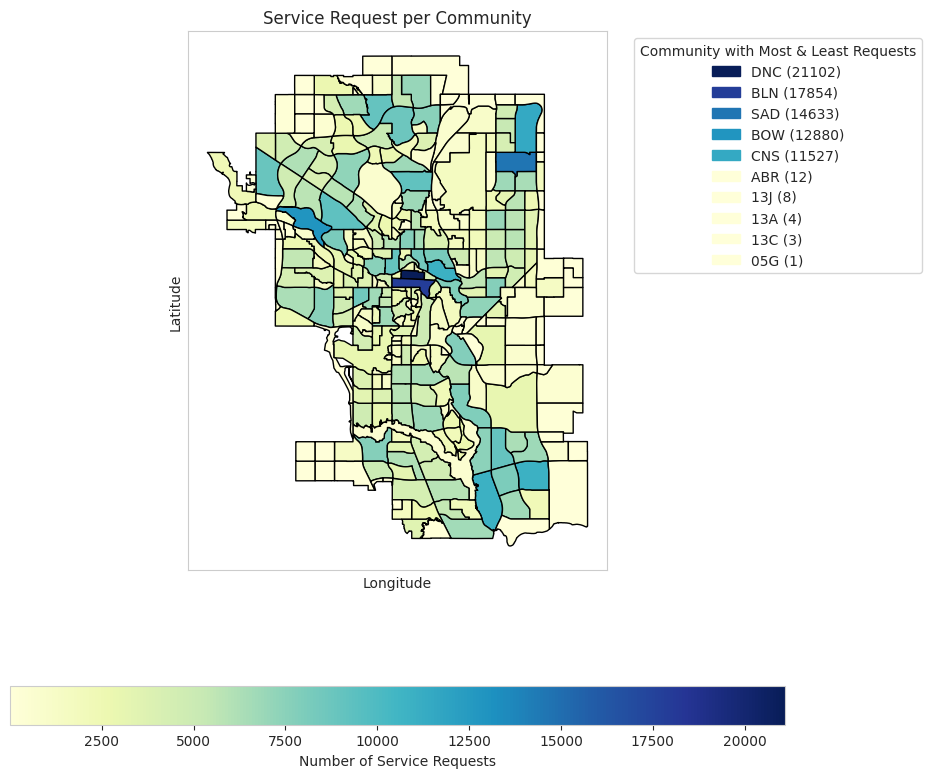

In [169]:
largest_community = merged_gdf.iloc[0]
smallest_community = merged_gdf.iloc[-1]
fig, ax = plt.subplots(figsize=(10, 10))

merged_gdf.plot(ax=ax, column='service_request_count', cmap='YlGnBu', edgecolor='black', legend=True,
                legend_kwds={'label': "Number of Service Requests", 'orientation': "horizontal"})

legend_patches = []
for idx, row in pd.concat([merged_gdf.head(5), merged_gdf.tail(5)]).iterrows():
    color = plt.cm.YlGnBu(row['service_request_count'] / merged_gdf['service_request_count'].max())
    legend_patches.append(mpatches.Patch(color=color, label=f"{row['comm_code']} ({row['service_request_count']})"))

ax.legend(handles=legend_patches, title="Community with Most & Least Requests", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

ax.set_title('Service Request per Community')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

## Interpertation:

1.   Community with the Largest Number of Service Requests is DNC (21102)
2.   Community with the Smallest Number of Service Requests is 05G (1)



### Q5. *Are there any specific needs for certain areas?*

In [176]:
service_request_counts = main_df.groupby(['community_sector', 'service_category'])['service_request_id'].count().reset_index()
service_request_counts.columns = ['Community Sector', 'Service Category', 'Request Count']
service_request_counts = service_request_counts.sort_values(by='Request Count', ascending=False)


In [177]:
max_request_per_sector = service_request_counts.loc[service_request_counts.groupby('Community Sector')['Request Count'].idxmax()]
print(max_request_per_sector[['Community Sector', 'Service Category', 'Request Count']])


          Community Sector Service Category  Request Count
59                  CENTRE           Roads           48820
131  Community Centrepoint      Recreation           16353
192                   EAST           Roads            8234
257                  NORTH           Roads           15816
323              NORTHEAST           Roads           22970
392              NORTHWEST           Roads           21380
463                  SOUTH           Roads           29745
541              SOUTHEAST             WRS           15901
597                   WEST           Roads           15203


### Q6. *What is the service requested most frequently?*

In [178]:
most_frequent_service = service_request_counts.groupby('Service Category')['Request Count'].sum().reset_index()
most_frequent_service = most_frequent_service.sort_values(by='Request Count', ascending=False)
print(most_frequent_service.head(1))

   Service Category  Request Count
72           Roads          179003


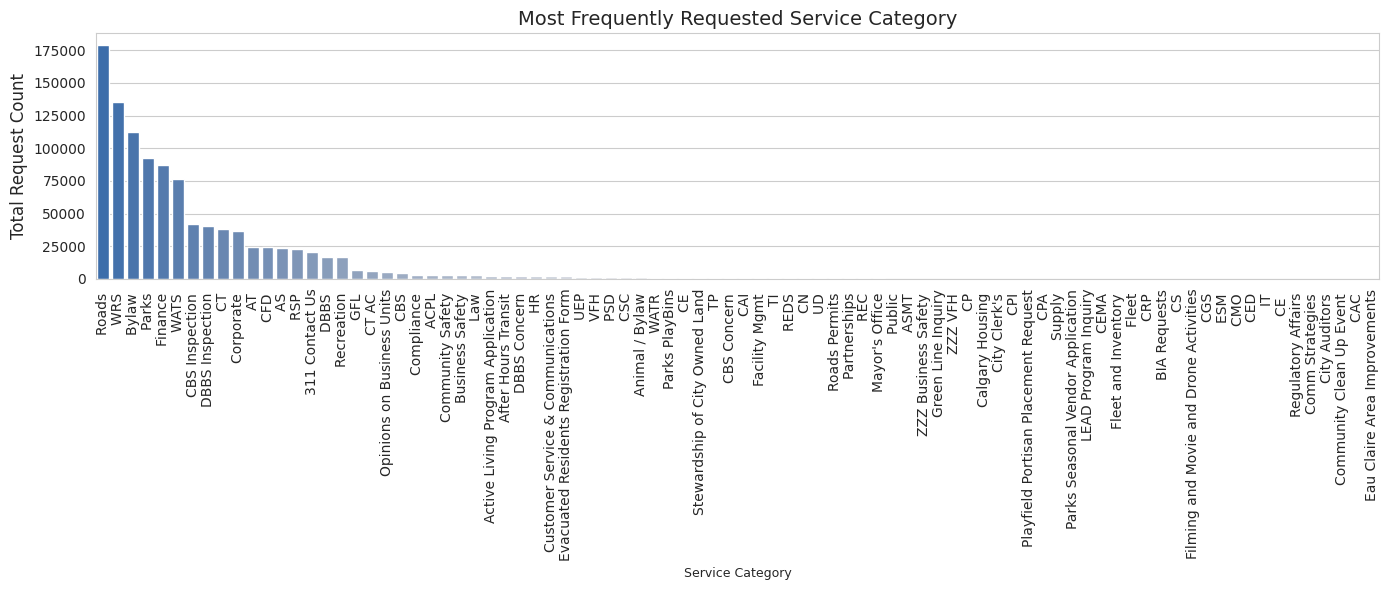

In [208]:
plt.figure(figsize=(14, 6))
sns.barplot(data=most_frequent_service, x='Service Category', y='Request Count',hue='Service Category', palette='vlag')
plt.title('Most Frequently Requested Service Category', fontsize=14)
plt.xlabel('Service Category', fontsize=9)
plt.ylabel('Total Request Count', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Q7. *During which seasons do service requests occur most often?​Are there any identifiable patterns?​*

In [199]:
seasonal_requests = main_df.groupby('Season')['service_request_id'].count().reset_index()
seasonal_requests.columns = ['Season', 'Total Request Count']
seasonal_requests = seasonal_requests.sort_values(by='Total Request Count', ascending=False)


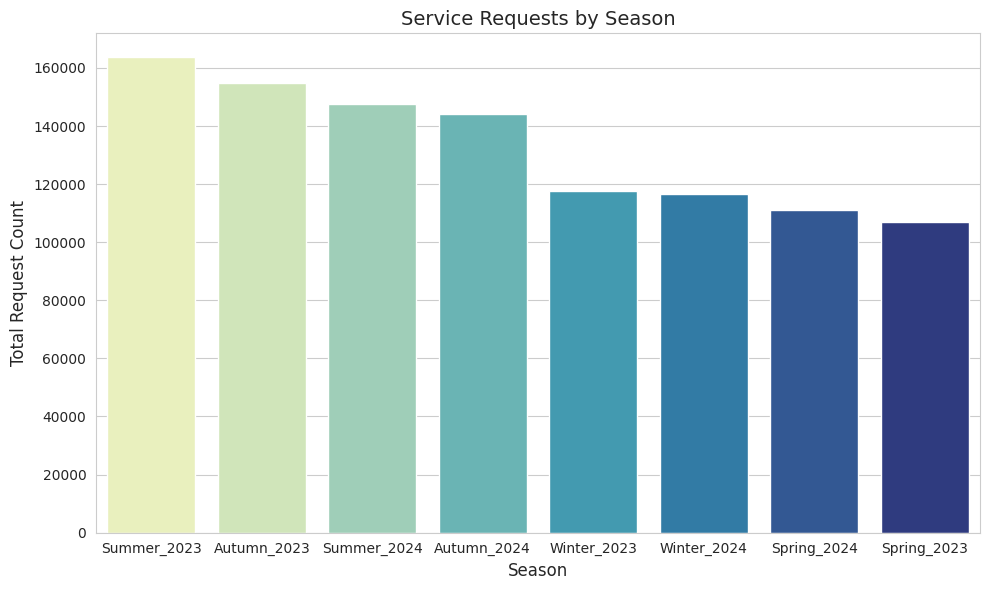

In [204]:
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_requests, x='Season', y='Total Request Count',hue='Season', palette='YlGnBu')
plt.title('Service Requests by Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Request Count', fontsize=12)
plt.tight_layout()
plt.show()

## Interpertation:


1.   High request season: Summer 2023
2.   Low request season: Spring 2023

TREND:
1.   Both 2023 and 2024 Summer have the highest service requests.
2. Second: Autum 2023 and 2024, drop from 2023 to 2024.
3. Winter shows similar
4. The least number of service requests in Spring

**Decreasing trend over the years**: We see a slight drop in the number of requests from 2023 to 2024 across most seasons




